In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

In [11]:
# Load the dataset
data = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [12]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [13]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

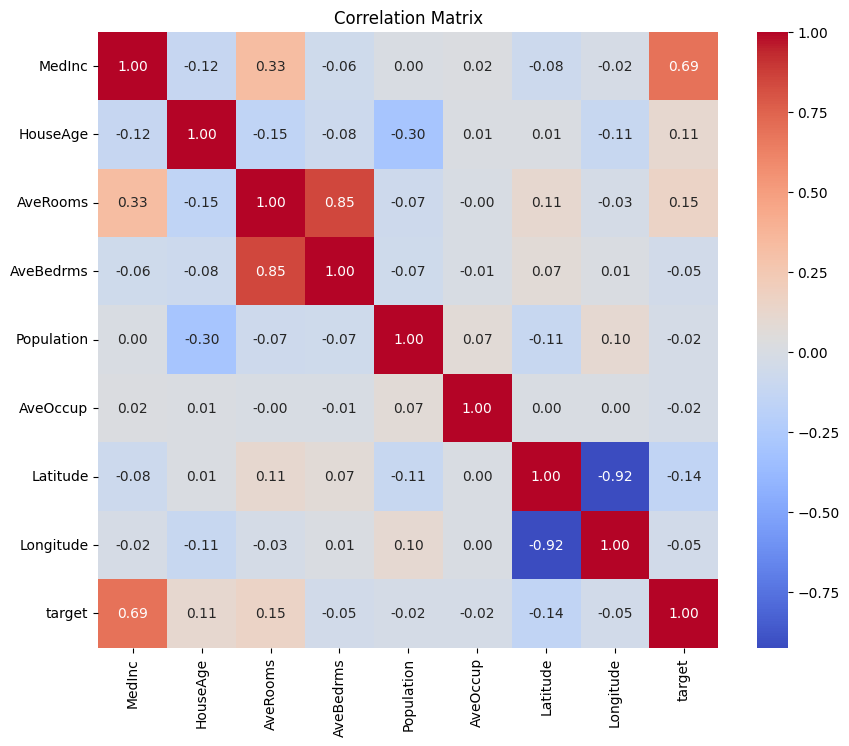

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

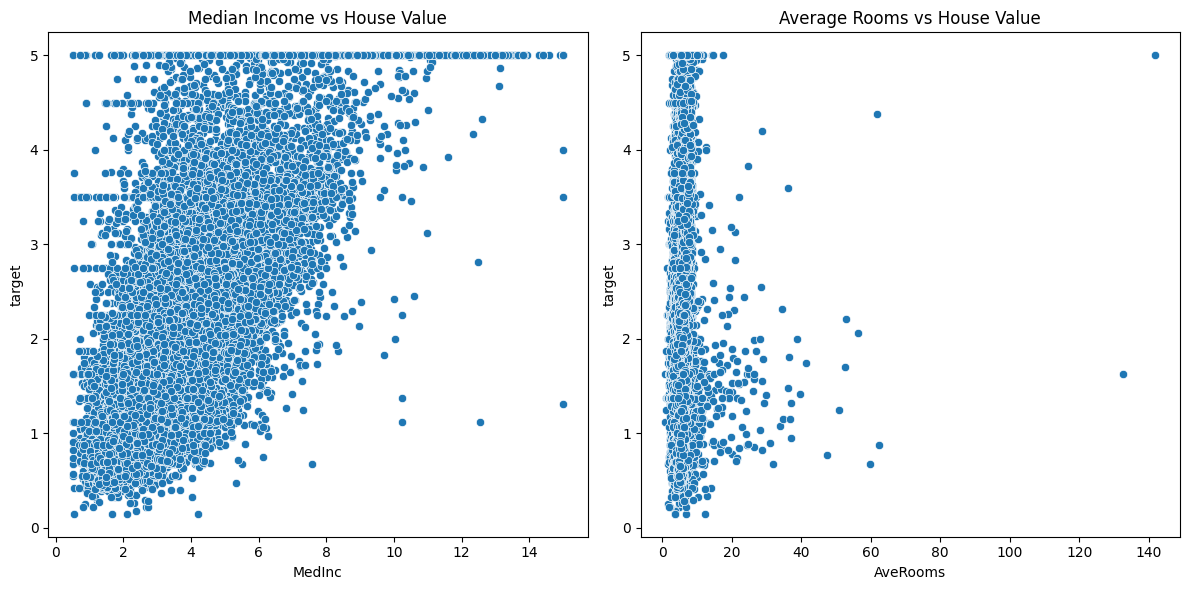

In [15]:
plt.figure(figsize=(12, 6))

# Median Income vs Target
plt.subplot(1, 2, 1)
sns.scatterplot(x='MedInc', y='target', data=df)
plt.title("Median Income vs House Value")

# Average Rooms vs Target
plt.subplot(1, 2, 2)
sns.scatterplot(x='AveRooms', y='target', data=df)
plt.title("Average Rooms vs House Value")

plt.tight_layout()
plt.show()

In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=data.feature_names)
df_scaled['target'] = df['target']  # Target doesn’t need scaling for regression

print("\nFirst 5 rows of scaled dataset:")
print(df_scaled.head())


First 5 rows of scaled dataset:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  target  
0  -1.327835   4.526  
1  -1.322844   3.585  
2  -1.332827   3.521  
3  -1.337818   3.413  
4  -1.337818   3.422  


In [17]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (16512, 8)
Testing set shape: (4128, 8)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("\nModel Coefficients:")
for feature, coef in zip(data.feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
MedInc: 0.8524
HouseAge: 0.1224
AveRooms: -0.3051
AveBedrms: 0.3711
Population: -0.0023
AveOccup: -0.0366
Latitude: -0.8966
Longitude: -0.8689
Intercept: 2.0679


In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Set:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Model Performance on Test Set:
Mean Squared Error: 0.5559
R-squared: 0.5758
